In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("d:/WorkFolder/pdata/datasets/axisdata.csv")

In [8]:
df.head()

,Fname,Lname,Gender,Hours Worked,SalesTraining,Years Experience,Cars Sold
0,Jada,Walters,F,39,N,3,2
1,Nicole,Henderson,F,46,N,3,6
2,Tanya,Moore,F,42,Y,4,6
3,Ronelle,Jackson,F,38,Y,5,3
4,Brad,Sears,M,33,N,4,2


In [9]:
df['Cars Sold'].mean()

3.9229229229229228

In [10]:
df['Cars Sold'].max()

7

In [12]:
df.describe()

,Hours Worked,Years Experience,Cars Sold
count,999.000000,999.000000,999.000000
mean,33.727728,3.026026,3.922923
std,8.223454,1.394709,1.527000
min,20.000000,1.000000,1.000000
25%,27.000000,2.000000,3.000000
50%,34.000000,3.000000,4.000000
75%,41.000000,4.000000,5.000000
max,48.000000,5.000000,7.000000


In [40]:
df.isnull().any()

Fname               False
Lname               False
Gender              False
Hours Worked        False
SalesTraining       False
Years Experience    False
Cars Sold           False
Cars Sold Log       False
Cars Sold Exp       False
dtype: bool

In [13]:
df.groupby("Gender").mean()

,Hours Worked,Years Experience,Cars Sold
Gender,,,
F,33.693252,3.049080,3.760736
M,33.760784,3.003922,4.078431


In [41]:
def convert_yn_char_to_value(ch):
    if (ch not in ['Y','N']):
        raise ValueError("Invalid value encountered " + str(ch))
        
    if ch == 'Y':
        return 1
    elif ch == 'N':
        return -1
    else:
        return 0
    

In [43]:
df["Cars Sold Log"] = np.log(df["Cars Sold"])
df["Cars Sold Exp"] = np.exp(df["Cars Sold"])

In [48]:
df["SalesTrainingValue"] = df["SalesTraining"].apply(convert_yn_char_to_value)

In [49]:
df.corr()

,Hours Worked,Years Experience,Cars Sold,Cars Sold Log,Cars Sold Exp,SalesTrainingValue
Hours Worked,1.000000,0.028400,0.251038,0.266495,0.250372,0.025857
Years Experience,0.028400,1.000000,0.062577,0.061323,0.084661,-0.017864
Cars Sold,0.251038,0.062577,1.000000,0.967286,0.777174,0.192009
Cars Sold Log,0.266495,0.061323,0.967286,1.000000,0.644511,0.205727
Cars Sold Exp,0.250372,0.084661,0.777174,0.644511,1.000000,0.176055
SalesTrainingValue,0.025857,-0.017864,0.192009,0.205727,0.176055,1.000000


In [28]:
def draw_prepared_mean_graph(df, groupByColumn, valueColumn):
    df2 = df.groupby(groupByColumn).mean()
    df2 = df2.reset_index()
    plt.scatter(df2[groupByColumn], df2[valueColumn])

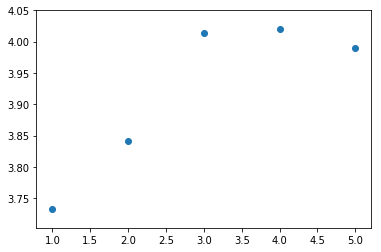

In [30]:
draw_prepared_mean_graph(df2, "Years Experience", "Cars Sold")

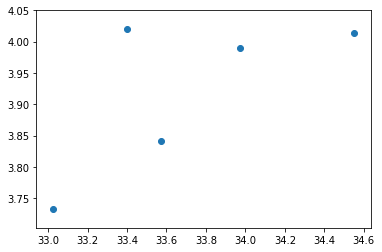

In [32]:
draw_prepared_mean_graph(df2, "Hours Worked", "Cars Sold")

In [38]:
df[df["Cars Sold"] > 3].describe()

,Hours Worked,Years Experience,Cars Sold,Cars Sold Log,Cars Sold Exp
count,589.000000,589.000000,589.000000,589.000000,589.000000
mean,34.740238,3.049236,5.006791,1.595480,224.028282
std,8.146538,1.373691,0.882533,0.174766,229.734144
min,20.000000,1.000000,4.000000,1.386294,54.598150
25%,28.000000,2.000000,4.000000,1.386294,54.598150
50%,35.000000,3.000000,5.000000,1.609438,148.413159
75%,42.000000,4.000000,6.000000,1.791759,403.428793
max,48.000000,5.000000,7.000000,1.945910,1096.633158


In [39]:
df[df["Cars Sold"] <= 3].describe()

,Hours Worked,Years Experience,Cars Sold,Cars Sold Log,Cars Sold Exp
count,410.000000,410.000000,410.000000,410.000000,410.000000
mean,32.273171,2.992683,2.365854,0.810615,12.895405
std,8.124250,1.425388,0.669127,0.340345,6.958079
min,20.000000,1.000000,1.000000,0.000000,2.718282
25%,25.000000,2.000000,2.000000,0.693147,7.389056
50%,32.000000,3.000000,2.000000,0.693147,7.389056
75%,39.000000,4.000000,3.000000,1.098612,20.085537
max,48.000000,5.000000,3.000000,1.098612,20.085537


In [51]:
df.groupby("SalesTrainingValue").mean()

,Hours Worked,Years Experience,Cars Sold,Cars Sold Log,Cars Sold Exp
SalesTrainingValue,,,,,
-1,33.474576,3.055690,3.573850,1.159878,94.465309
1,33.906143,3.005119,4.168942,1.353345,167.620480
